In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime

c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\trevo\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
with open('Tag_Text_FIles/tags2.txt', 'r') as file:
    reader = csv.reader(file)

    data = []             # Initialize empty list
    database = dict()
    recent_EPC = ''
    Time_Or_Data = True   # Time is true, Data is false

    for l in reader:
        line = l[0]
         
        if len(line)==24: # If it is an EPC
            database[line] = [[],[]]
            recent_EPC = line
        
        elif line == '[':
            data = []

        elif line == ']': # End of list
            if len(data)!=0:
                if Time_Or_Data:
                    database[recent_EPC][0] = data
                    Time_Or_Data = False
                else:
                    database[recent_EPC][1] = data
                    Time_Or_Data = True
            data = []

        elif len(line)==8: # If it is a time stamp
            h,m,s = line.split(':')
            data.append(datetime.datetime(1900,1,1,int(h),int(m),int(s)))
        
        elif line ==' ':
            pass

        else: # If it is a data point
            try:
                data.append(float(line))
            except:
                pass


In [3]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')

Text(0.5, 1.0, 'Tags in Cold Chamber Test')

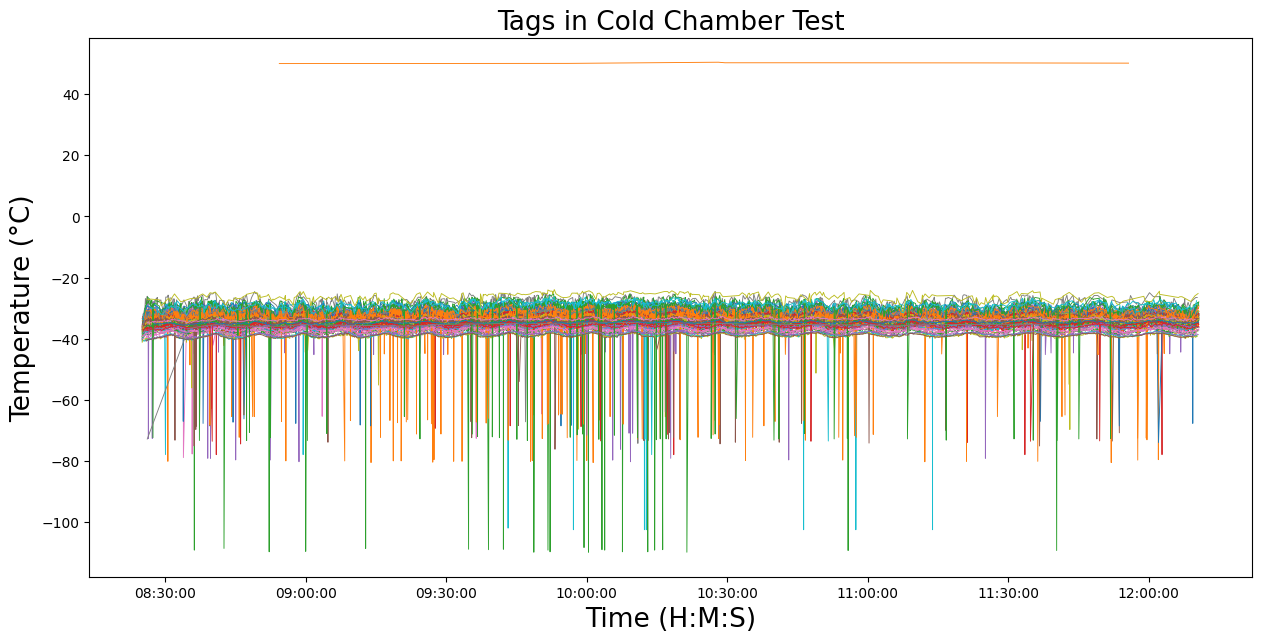

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_formatter(myFmt)

for k,v in database.items():
    ax.plot(v[0], v[1], label=k, linewidth=0.65)

# ax.legend()
ax.set_ylabel("Temperature (°C)", fontsize=19)
ax.set_xlabel("Time (H:M:S)", fontsize=19)
ax.set_title("Tags in Cold Chamber Test", fontsize=19)

# ax.set_ylim(bottom=-42.0)

In [8]:
vs = dict()
for k,v in database.items():

    v_0 = []
    ts = []

    for time in v[0]:

        span = time + datetime.timedelta(minutes=1)

        count = 0
        for a,b in zip(v[0],v[1]):
            if a < span and a > time:
                count += 1
        
        v_0.append(count)
        ts.append(time)
    vs[k] = [v_0, ts]


In [9]:
from tqdm import tqdm
start = datetime.datetime(1900,1,1,8,24,0);

times, counts = [], []
for i in tqdm(range(12600)):
    span = start + datetime.timedelta(seconds=60)

    count = 0
    for k,v in database.items():
        for i,j in zip(v[0],v[1]):
            if i < span and i > start:
                count += 1
    times.append(start)
    counts.append(count)

    start += datetime.timedelta(seconds=1)


100%|██████████| 12600/12600 [05:12<00:00, 40.38it/s]


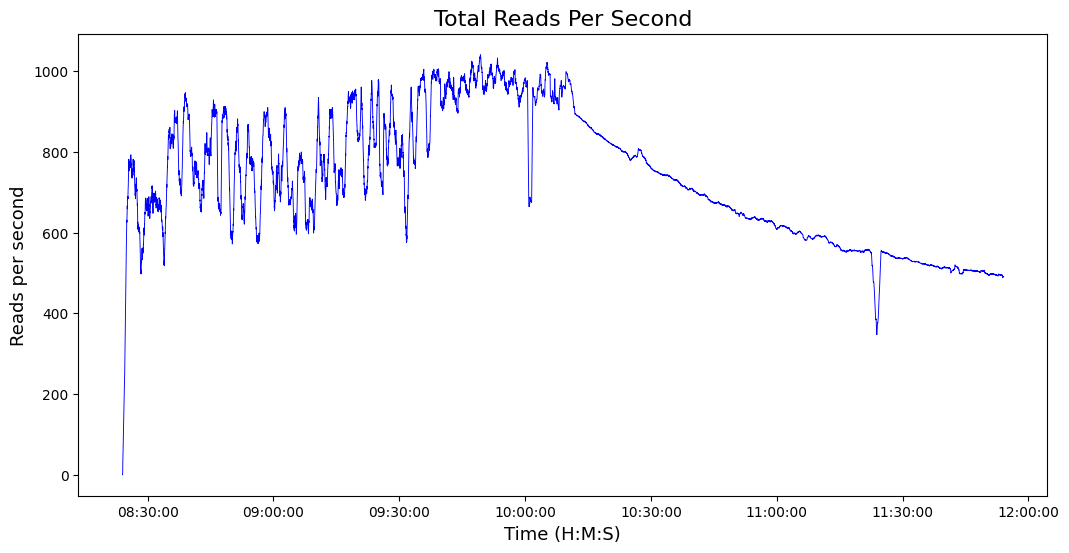

In [11]:
# plt.figure(figsize=(12.5,6))
# plt.plot(times, counts, "blue", linewidth=0.65)
# plt.xlabel("Number of Reads", fontsize=13)
# plt.ylabel("Reads per second", fontsize=13)
# plt.title("Total Reads Per Second", fontsize=16)

fig, ax = plt.subplots(figsize=(12.5, 6))
ax.plot(times, counts, "blue", linewidth=0.65)
ax.set_xlabel("Time (H:M:S)", fontsize=13)
ax.set_ylabel("Reads per second", fontsize=13)
ax.set_title("Total Reads Per Second", fontsize=16)
ax.xaxis.set_major_formatter(myFmt)

Text(0, 0.5, 'Reads per second')

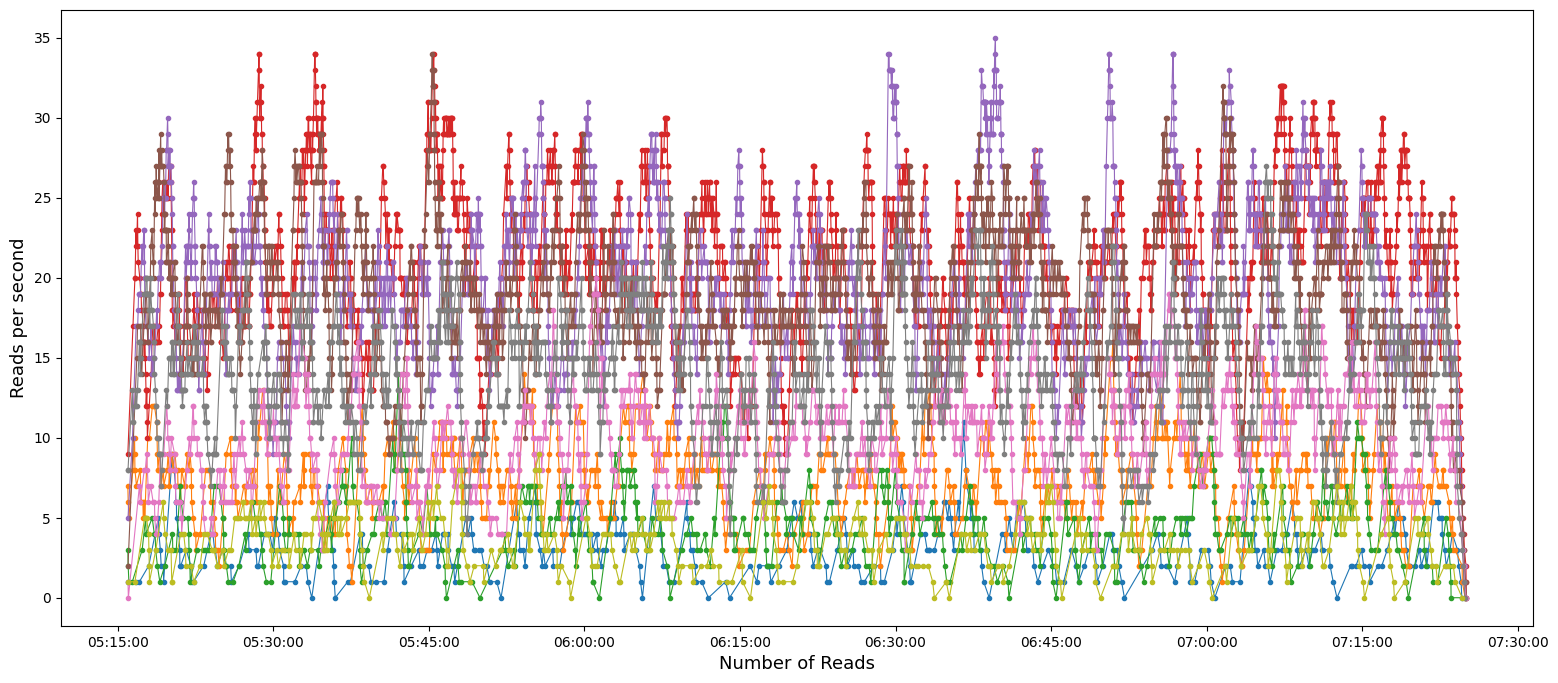

In [85]:
fig, ax = plt.subplots(figsize=(19,8))
ax.xaxis.set_major_formatter(myFmt)

for i,j in vs.items():
    ax.plot(j[1], j[0], linewidth=0.8, label=i, marker=".")
ax.set_xlabel("Number of Reads", fontsize=13)
ax.set_ylabel("Reads per second", fontsize=13)